# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [4]:
data_backup = data
data_backup

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3


### **Class Distribution Analysis**

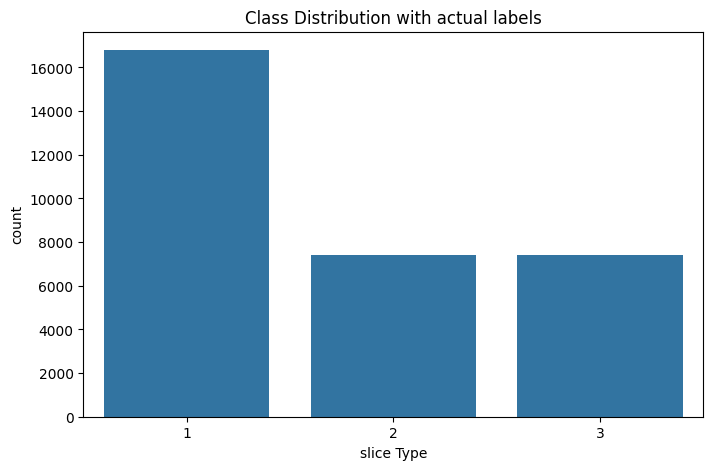

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

### **Experiment 8 with undersampling**

Activate this section Experiment 8 when willing to perform undersampling before proceeding with the further steps.

In [6]:
# # Identify the majority class
# majority_class = data['slice Type'].value_counts().idxmax()

# # Count the number of data points in the majority class
# majority_count = data['slice Type'].value_counts()[majority_class]

# # Count the number of data points in the other two classes
# minority_count = data['slice Type'].value_counts().min()

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count

# # Randomly select data points from the majority class to remove
# majority_indices = data[data['slice Type'] == majority_class].index
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
# print(remove_indices[:100])

# # Remove the selected data points from the DataFrame
# balanced_data = data.drop(remove_indices)

In [7]:
# data = balanced_data
# data.head()

In [8]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=data['slice Type'])
# plt.title('Balanced Class Distribution with actual labels')
# plt.show()

### **Relevant Feature Selection**

In [9]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

### **Define X and y**

In [10]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
1,0.001000,100,0,1,1,0
2,0.000001,300,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,50,1,0,0,1
...,...,...,...,...,...,...
31578,0.010000,100,0,1,0,1
31579,0.010000,50,1,0,0,1
31580,0.010000,300,1,0,1,0
31581,0.000001,10,1,0,0,1


In [11]:
y = data['slice Type']

### **Apply t-sne to X**

In [12]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
1,0.001000,100,0,1,1,0
2,0.000001,300,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,50,1,0,0,1
...,...,...,...,...,...,...
31578,0.010000,100,0,1,0,1
31579,0.010000,50,1,0,0,1
31580,0.010000,300,1,0,1,0
31581,0.000001,10,1,0,0,1


In [ ]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

In [ ]:
X = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1]})
X

In [ ]:
data = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1], 'slice Type': y})
data

In [ ]:
features = ['Feature1', 'Feature2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [ ]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

In [ ]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

In [ ]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

#### **Ground Truth Slice 2**

In [ ]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

In [ ]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

In [ ]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

#### **Ground Truth Slice 3**

In [ ]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

In [ ]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

In [ ]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

#### **Plot Ground Truth**

In [ ]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

In [ ]:
# # Apply PCA to reduce the dimensionality to 3 dimensions
# pca = PCA(n_components=3)
# centroids_3d = pca.fit_transform(GT_centroids)
# centroids_3d

In [ ]:
# # Plot the centroids in 3D space
# fig = plt.figure(figsize=(14, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# plt.title('Ground Truth Centroids (3D)')
# plt.show()

### **Datasplit - X, X_train and X_test**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

# **EDA**

## Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [ ]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [ ]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

In [ ]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

In [ ]:
len(kmeans_model_labels_aligned)

In [ ]:
np.unique(kmeans_model_labels_aligned)

## **Model Centroids**

In [ ]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

In [ ]:
# Function to format a single value
def format_value(value):
    # Format value to have at least three digits with leading zeros if necessary
    formatted_value = f"{value:.3e}"
    # Replace any instances of "e-0" with "e-" to ensure consistent formatting
    # formatted_value = formatted_value.replace("e-0", "e-")
    # Return the formatted value
    return formatted_value

# Function to format an array
def format_array(array):
    # Define the number of elements per line
    elements_per_line = 3

    # Iterate over each row in the array
    formatted_rows = []
    for row in array:
        # Format each value in the row and join them with a comma and newline, printing only a certain number of elements per line
        formatted_elements = [format_value(value) for value in row]
        formatted_row = ', '.join(formatted_elements[:elements_per_line])

        # Check if there are more elements to print
        if len(formatted_elements) > elements_per_line:
            # Print remaining elements on new lines
            for i in range(elements_per_line, len(formatted_elements), elements_per_line):
                formatted_row += ',\n\t' + ', '.join(formatted_elements[i:i + elements_per_line])

        # Enclose the formatted row within double square brackets
        formatted_row = "[" + formatted_row + "]"

        # Append the formatted row to the list of formatted rows
        formatted_rows.append(formatted_row)

    # Combine the rows into a string with proper array formatting
    formatted_string = "[" + ",\n       ".join(formatted_rows) + "]"
    return formatted_string

In [ ]:
# Format the given array
formatted_centroids_array_before = format_array(kmeans_model_centroids)
print("array("+formatted_centroids_array_before+")")

In [ ]:
C1 = kmeans_model_centroids[0]
C1

In [ ]:
C2 = kmeans_model_centroids[1]
C2

In [ ]:
C3 = kmeans_model_centroids[2]
C3

In [ ]:
arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
arr
arr.dtype

## **Minimum Distance of C1 from Ground Truths**

In [ ]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

In [ ]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

In [ ]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

In [ ]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

## **Minimum Distance of C2 from Ground Truths**

In [ ]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

In [ ]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

In [ ]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

In [ ]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

## **Minimum Distance of C3 from Ground Truths**

In [ ]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

In [ ]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

In [ ]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

In [ ]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

## **Model Centroids Mapping to Labels**

In [ ]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

In [ ]:
kmeans_model

In [ ]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

In [ ]:
kmeans_model_mod.cluster_centers_ = arr

In [ ]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

In [ ]:
# Format the given array
formatted_centroids_array_after = format_array(kmeans_model_centroids_mapped)
print("array("+formatted_centroids_array_after+")")

# **Model Testing**

In [ ]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

In [ ]:
y_pred_aligned = y_pred + 1
y_pred_aligned

In [ ]:
len(y_pred_aligned)

In [ ]:
np.unique(y_pred_aligned)

## **Update testing dataset with labels**

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [ ]:
# Display the Updated Table
X_test_with_labels[:20]

## **Predicted Label Analysis**

In [ ]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [ ]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

In [ ]:
conf_matrix = cm
conf_matrix

In [ ]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

In [ ]:
acc = (TP + TN)/(TP + TN + FP + FN)
acc

In [ ]:
pres = TP/(TP + FP)
pres

In [ ]:
rec = TP/(TP + FN)
rec

In [ ]:
f1 = 2 * ((pres * rec)/(pres + rec))
f1

In [ ]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

In [ ]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

In [ ]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp6 & 8 - Slice_Identification_UnSupML_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'